In [5]:
import requests     # 2.18.4
import pandas as pd # 0.23.0
import datetime
import io
import re
from timedisagg.td import TempDisagg
from datetime import date
import yfinance as yf

In [17]:
def download_data(key_string_start, key_string_main, start_year, end_year):
    entrypoint = 'https://sdw-wsrest.ecb.europa.eu/service/' # Using protocol 'https'
    resource = 'data'           # The resource for data queries is always'data'
    flowRef = key_string_start              # Dataflow describing the data that needs to be returned, exchange rates in this case
    key = key_string_main    # Defining the dimension values, explained below

    # Define the parameters
    parameters = {
        'startPeriod': start_year,  # Start date of the time series
        'endPeriod': end_year     # End of the time series
    }

    request_url = entrypoint + resource + '/'+ flowRef + '/' + key
    
    name_response = requests.get(request_url, params=parameters)

    response = requests.get(request_url, params=parameters, headers={'Accept': 'text/csv'})
    
    name = re.findall('Value id="TITLE" value=.+?\"', name_response.text)[0][23::].replace('\"','')

    df = pd.read_csv(io.StringIO(response.text))

    ts = df.filter(['TIME_PERIOD', 'OBS_VALUE'], axis=1)

    ts = ts.set_index('TIME_PERIOD')
    
    full_key_string = key_string_start + "." + key_string_main
    
    ts.to_csv(f"{full_key_string}.csv")
    
    print(name)
    
    ts.plot()
    
    return ts

today = "2021-12-31"

start_date = "2019-01-01"

## 1-Year

Yield curve instantaneous forward rate, 1-year maturity - Government bond, nominal, all issuers whose rating is triple A - Euro area (changing composition)


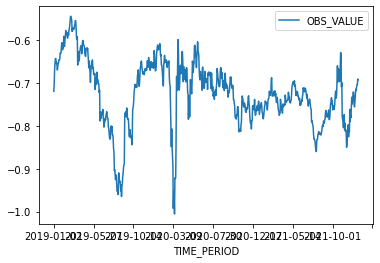

In [18]:
one_year = download_data("YC", "B.U2.EUR.4F.G_N_A.SV_C_YM.IF_1Y", start_date, today) #Daily

In [19]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(one_year)

             OBS_VALUE
TIME_PERIOD           
2019-01-02   -0.719590
2019-01-03   -0.704440
2019-01-04   -0.669942
2019-01-07   -0.657661
2019-01-08   -0.643317
2019-01-09   -0.643144
2019-01-10   -0.653450
2019-01-11   -0.651763
2019-01-14   -0.658775
2019-01-15   -0.669899
2019-01-16   -0.660821
2019-01-17   -0.653676
2019-01-18   -0.653283
2019-01-21   -0.646356
2019-01-22   -0.647032
2019-01-23   -0.644259
2019-01-24   -0.630398
2019-01-25   -0.631343
2019-01-28   -0.630253
2019-01-29   -0.619247
2019-01-30   -0.606323
2019-01-31   -0.606991
2019-02-01   -0.622868
2019-02-04   -0.617975
2019-02-05   -0.614018
2019-02-06   -0.591259
2019-02-07   -0.611808
2019-02-08   -0.614895
2019-02-11   -0.599510
2019-02-12   -0.591720
2019-02-13   -0.578017
2019-02-14   -0.586027
2019-02-15   -0.583458
2019-02-18   -0.586423
2019-02-19   -0.595169
2019-02-20   -0.595670
2019-02-21   -0.582449
2019-02-22   -0.588989
2019-02-25   -0.577327
2019-02-26   -0.574555
2019-02-27   -0.565634
2019-02-28 

## 8-Years

Yield curve instantaneous forward rate, 8-year maturity - Government bond, nominal, all issuers whose rating is triple A - Euro area (changing composition)


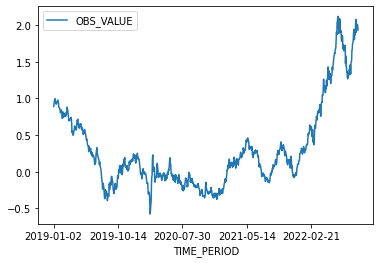

In [5]:
eight_year = download_data("YC", "B.U2.EUR.4F.G_N_A.SV_C_YM.IF_8Y", start_date, today)

## 20-Years

Yield curve instantaneous forward rate, 20-year maturity - Government bond, nominal, all issuers whose rating is triple A - Euro area (changing composition)


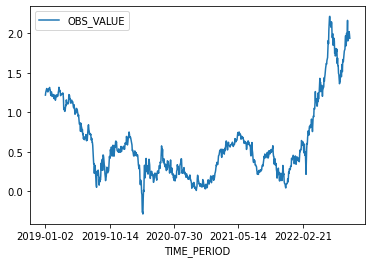

In [6]:
twenty_year = download_data("YC", "B.U2.EUR.4F.G_N_A.SV_C_YM.IF_20Y", start_date, today) 

## CISS

NEW CISS - Composite Indicator of Systemic Stress 


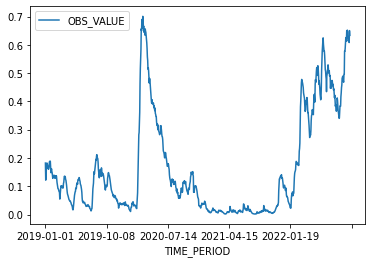

In [13]:
CISS = download_data("CISS", "D.U2.Z0Z.4F.EC.SS_CIN.IDX", start_date, today) 

In [14]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(CISS)

             OBS_VALUE
TIME_PERIOD           
2019-01-01    0.182196
2019-01-02    0.121862
2019-01-03    0.142492
2019-01-04    0.169528
2019-01-07    0.178160
2019-01-08    0.182422
2019-01-09    0.175916
2019-01-10    0.175911
2019-01-11    0.164230
2019-01-14    0.167769
2019-01-15    0.160030
2019-01-16    0.164715
2019-01-17    0.168119
2019-01-18    0.186235
2019-01-21    0.188427
2019-01-22    0.187831
2019-01-23    0.188696
2019-01-24    0.164478
2019-01-25    0.148120
2019-01-28    0.157553
2019-01-29    0.161933
2019-01-30    0.152657
2019-01-31    0.147650
2019-02-01    0.137684
2019-02-04    0.128159
2019-02-05    0.136711
2019-02-06    0.132672
2019-02-07    0.138045
2019-02-08    0.139411
2019-02-11    0.135516
2019-02-12    0.130452
2019-02-13    0.128188
2019-02-14    0.128398
2019-02-15    0.137461
2019-02-18    0.136883
2019-02-19    0.134501
2019-02-20    0.136621
2019-02-21    0.123365
2019-02-22    0.112994
2019-02-25    0.106300
2019-02-26    0.098075
2019-02-27 

## EONIA

Rate for the overnight maturity calculated as the euro short-term rate plus a spread of 8.5 basis points


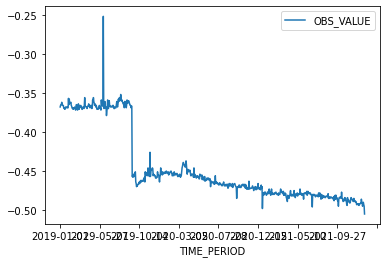

In [15]:
EONIA = download_data("EON", "D.EONIA_TO.RATE", start_date, today)

In [18]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(EONIA)

             OBS_VALUE
TIME_PERIOD           
2019-01-02      -0.368
2019-01-03      -0.366
2019-01-04      -0.365
2019-01-07      -0.365
2019-01-08      -0.362
2019-01-09      -0.365
2019-01-10      -0.366
2019-01-11      -0.366
2019-01-14      -0.366
2019-01-15      -0.369
2019-01-16      -0.370
2019-01-17      -0.369
2019-01-18      -0.371
2019-01-21      -0.369
2019-01-22      -0.368
2019-01-23      -0.368
2019-01-24      -0.369
2019-01-25      -0.369
2019-01-28      -0.368
2019-01-29      -0.369
2019-01-30      -0.369
2019-01-31      -0.357
2019-02-01      -0.365
2019-02-04      -0.358
2019-02-05      -0.363
2019-02-06      -0.363
2019-02-07      -0.363
2019-02-08      -0.362
2019-02-11      -0.366
2019-02-12      -0.367
2019-02-13      -0.369
2019-02-14      -0.370
2019-02-15      -0.369
2019-02-18      -0.371
2019-02-19      -0.369
2019-02-20      -0.370
2019-02-21      -0.370
2019-02-22      -0.368
2019-02-25      -0.370
2019-02-26      -0.372
2019-02-27      -0.371
2019-02-28 

## Stock data

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

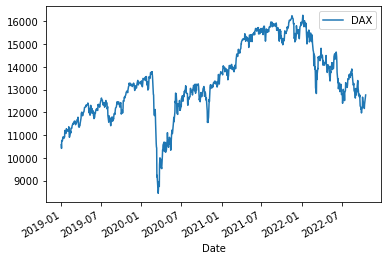

In [11]:
stock = "^GDAXI"

name = "DAX"

stock_data = yf.download(stock, start=start_date, end=today)
stock_dropped = stock_data.drop(labels=["Open", "High", "Low", "Close", "Volume"], axis = 1)
stock_renamed = stock_dropped.rename(columns={'Adj Close': name})
       
stock_renamed.plot()

In [12]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(stock_renamed)

                                    DAX
Date                                   
2019-01-02 00:00:00+01:00  10580.190430
2019-01-03 00:00:00+01:00  10416.660156
2019-01-04 00:00:00+01:00  10767.690430
2019-01-07 00:00:00+01:00  10747.809570
2019-01-08 00:00:00+01:00  10803.980469
2019-01-09 00:00:00+01:00  10893.320312
2019-01-10 00:00:00+01:00  10921.589844
2019-01-11 00:00:00+01:00  10887.459961
2019-01-14 00:00:00+01:00  10855.910156
2019-01-15 00:00:00+01:00  10891.790039
2019-01-16 00:00:00+01:00  10931.240234
2019-01-17 00:00:00+01:00  10918.620117
2019-01-18 00:00:00+01:00  11205.540039
2019-01-21 00:00:00+01:00  11136.200195
2019-01-22 00:00:00+01:00  11090.110352
2019-01-23 00:00:00+01:00  11071.540039
2019-01-24 00:00:00+01:00  11130.179688
2019-01-25 00:00:00+01:00  11281.790039
2019-01-28 00:00:00+01:00  11210.309570
2019-01-29 00:00:00+01:00  11218.830078
2019-01-30 00:00:00+01:00  11181.660156
2019-01-31 00:00:00+01:00  11173.099609
2019-02-01 00:00:00+01:00  11180.660156


## Combining

In [11]:
one_year.index = pd.to_datetime(one_year.index)
eight_year.index = pd.to_datetime(eight_year.index)
twenty_year.index = pd.to_datetime(twenty_year.index)
CISS.index = pd.to_datetime(CISS.index)
EONIA.index = pd.to_datetime(EONIA.index)

one_year["eight_year"] = eight_year
one_year["twenty_year"] = twenty_year
one_year["CISS"] = CISS
one_year["EONIA"] = EONIA
one_year["DAX"] = stock_renamed
final_df = one_year.rename(columns={"OBS_VALUE": "one_year"})

final_df.index = final_df.index.map(str)

In [16]:
final_df.to_stata(r"C:\Users\Peter\OneDrive\My Own Projects\Bachelor\event_dataset.dta")